In [ ]:
import pandas as pd

df=pd.read_csv('nyc_taxi.csv', parse_dates=['pickup_datetime'], nrows=500000)
print(df.head())

       key  fare_amount           pickup_datetime  pickup_longitude  \
0  26:21.0          4.5 2009-06-15 17:26:21+00:00        -73.844311   
1  52:16.0         16.9 2010-01-05 16:52:16+00:00        -74.016048   
2  35:00.0          5.7 2011-08-18 00:35:00+00:00        -73.982738   
3  30:42.0          7.7 2012-04-21 04:30:42+00:00        -73.987130   
4  51:00.0          5.3 2010-03-09 07:51:00+00:00        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1  


In [ ]:
nyc_min_longitude=-74.05
nyc_max_longitude=-73.75

nyc_min_latitude=40.63
nyc_max_latitude=40.85

df2=df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
  df2=df2[(df2[long]>nyc_min_longitude)&(df2[long]<nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2=df2[(df2[lat]>nyc_min_latitude)&(df2[lat]<nyc_max_latitude)]

In [ ]:
landmarks={'JFK Airport' : (-73.78, 40.643), 
           'Laguardia Airport' : (-73.87, 40.77), 
           'Midtown' : (-73.98, 40.76), 
           'Lower Manhattan' : (-74.00, 40.72), 
           'Upper Manhattan' : (-73.94, 40.82), 
           'Brooklyn' : (-73.95, 40.66)}

In [ ]:
import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
  plt.figure(figsize=(12, 12))
  if points=='Pickup':
    plt.plot(list(df.pickup_longitude), list(df.pickup_latitude),'.',markersize=1)
  else:
    plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)
  for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0]+0.005,
                 landmarks[landmark][1]+0.005), color='r',
                 backgroundcolor='w')
  plt.title("{} Locations in NYC Illustrated".format(points))
  plt.grid(None)
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")
  plt.show()


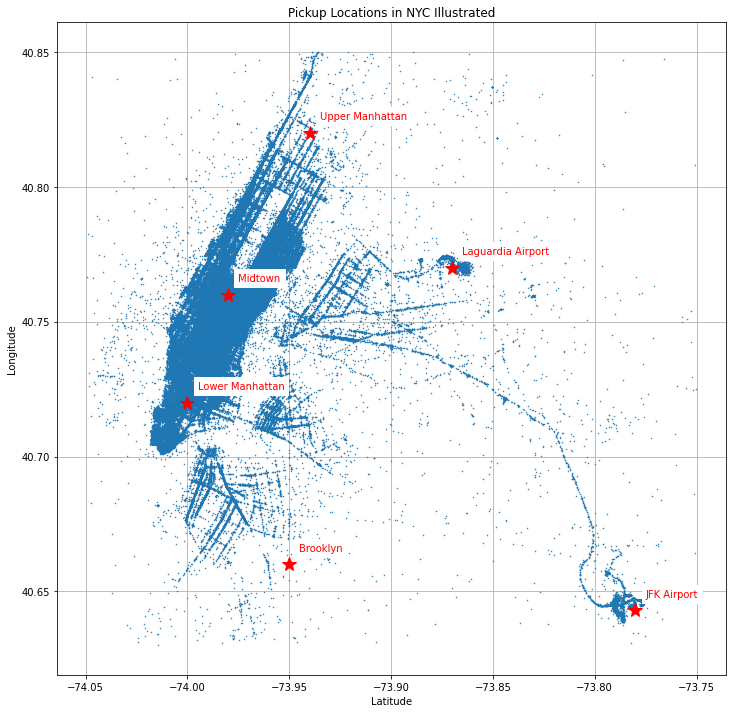

In [ ]:
plot_lat_long(df2, landmarks, points='Pickup')

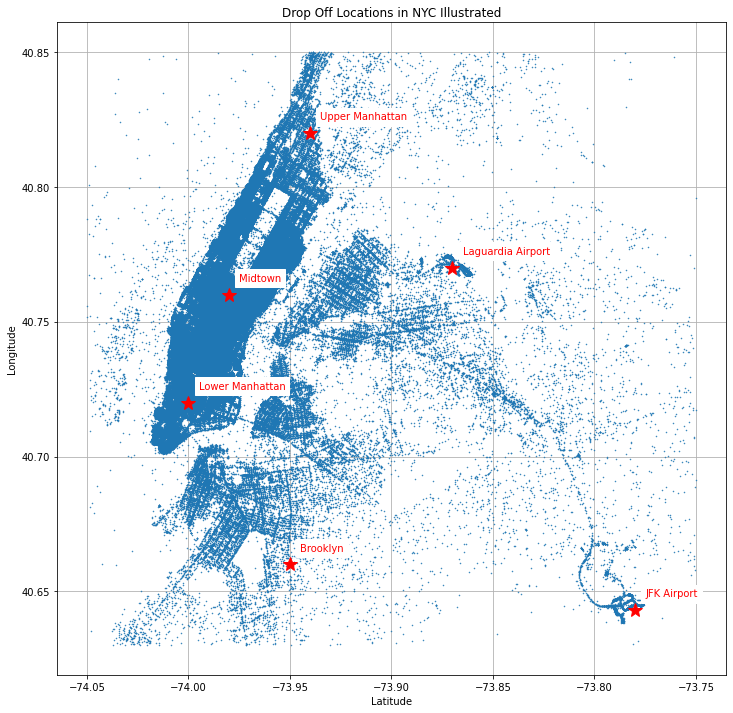

In [ ]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [ ]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['day_of_week']=df['pickup_datetime'].dt.dayofweek
df['hour']=df['pickup_datetime'].dt.hour

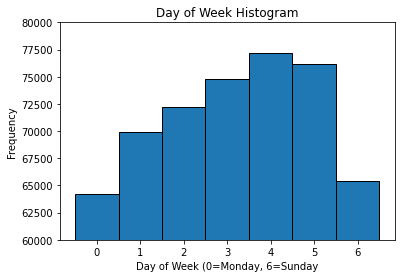

In [ ]:
import numpy as np

df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000, 80000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday')
plt.title('Day of Week Histogram')
plt.show()

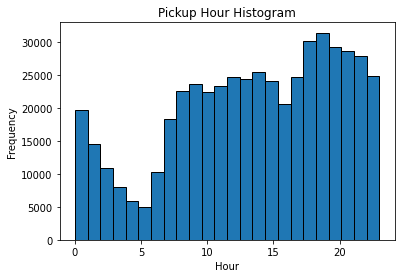

In [ ]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel("Hour")
plt.show()

In [ ]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
df=df.dropna()
print(df.describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  499994.000000     499994.000000    499994.000000      499994.000000   
mean       11.358195        -72.520088        39.920348         -72.522432   
std         9.916075         11.856458         8.073326          11.797374   
min       -44.900000      -2986.242495     -3116.285383       -3383.296608   
25%         6.000000        -73.992048        40.734917         -73.991382   
50%         8.500000        -73.981785        40.752670         -73.980126   
75%        12.500000        -73.967117        40.767076         -73.963572   
max       500.000000       2140.601160      1703.092772          40.851027   

       dropoff_latitude  passenger_count           year          month  \
count     499994.000000    499994.000000  499994.000000  499994.000000   
mean          39.916524         1.683446    2011.739133       6.268621   
std            7.391010         1.307392       1.860897       3.437800   
m

In [ ]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


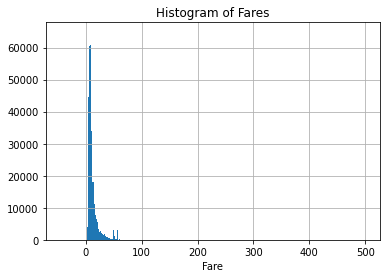

In [ ]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

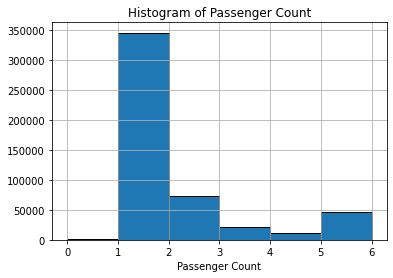

In [ ]:
import matplotlib.pyplot as plt 

df=df[(df['fare_amount']>=0)&(df['fare_amount']<=100)]

df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count");
plt.title("Histogram of Passenger Count")
plt.show()

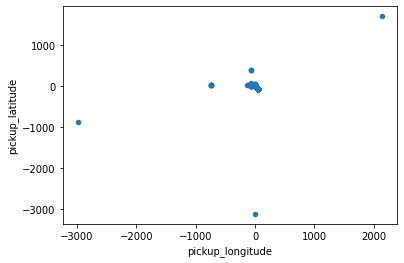

In [ ]:
df.loc[df['passenger_count']==0, 'passenger_count']=1

df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [ ]:
nyc_min_longitude=-74.05
nyc_max_longitude=-73.75

nyc_min_latitude=40.63
nyc_max_latitude=40.85

for long in ['pickup_longitude', 'dropoff_longitude']:
  df2=df2[(df2[long]>nyc_min_longitude)&(df2[long]<nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2=df2[(df2[lat]>nyc_min_latitude)&(df2[lat]<nyc_max_latitude)]

In [ ]:
def preprocess(df):
  def remove_missing_values(df):
    df=df.dropna()
    return df
  
  def remove_fare_amount_outliers(df, lower_bound, upper_bound):
    df=df[(df['fare_amount']>lower_bound)&
          (df['fare_amount']<upper_bound)]
    return df

  def replace_passenger_count_outliers(df):
    mode=df['passenger_count'].mode().values[0]
    df.loc[df['passenger_count']==0, 'passenger_count']=1
    return df
  
  def remove_lat_long_outliers(df):
    nyc_min_longitude=-74.05
    nyc_max_longitude=-73.75

    nyc_min_latitude=40.63
    nyc_max_latitude=40.85

    for long in ['pickup_longitude', 'dropoff_longitude']:
      df=df[(df[long]>nyc_min_longitude)&(df[long]<nyc_max_longitude)]
    for lat in ['pickup_latitude', 'dropoff_latitude']:
      df=df[(df[lat]>nyc_min_latitude)&(df[lat]<nyc_max_latitude)]
    return df

  df=remove_missing_values(df)
  df=remove_fare_amount_outliers(df, lower_bound=0, upper_bound=100)
  df=replace_passenger_count_outliers(df)
  df=remove_lat_long_outliers(df)
  return df
df=preprocess(df)

In [ ]:
print(df.head())

       key  fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0  26:21.0          4.5        -73.844311        40.721319         -73.841610   
1  52:16.0         16.9        -74.016048        40.711303         -73.979268   
2  35:00.0          5.7        -73.982738        40.761270         -73.991242   
3  30:42.0          7.7        -73.987130        40.733143         -73.991567   
4  51:00.0          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  year  month  day  day_of_week  hour  
0         40.712278                1  2009      6   15            0    17  
1         40.782004                1  2010      1    5            1    16  
2         40.750562                2  2011      8   18            3     0  
3         40.758092                1  2012      4   21            5     4  
4         40.783762                1  2010      3    9            1     7  


In [ ]:
print(df.head()['pickup_datetime'])

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [ ]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['day_of_week']=df['pickup_datetime'].dt.dayofweek
df['hour']=df['pickup_datetime'].dt.hour

print(df.loc[:5,['pickup_datetime', 'year', 'month', 'day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [ ]:
df=df.drop(['pickup_datetime'], axis=1)

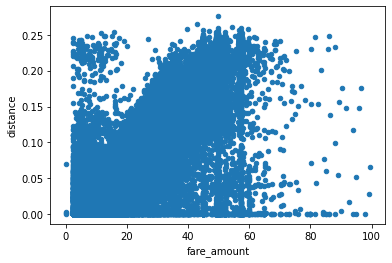

In [ ]:
def euc_distance(lat1, long1, lat2, long2):
  return(((lat1-lat2)**2+(long1-long2)**2)**0.5)

df['distance']=euc_distance(df['pickup_latitude'],
                            df['pickup_longitude'],
                            df['dropoff_latitude'],
                            df['dropoff_longitude'])

df['distance']=df[df['distance']<0.3]['distance']
df.plot.scatter('fare_amount', 'distance')
plt.show()

In [ ]:
print(df[df['distance']<0.3]['distance'])

0         0.009436
1         0.079696
2         0.013674
3         0.025340
4         0.019470
            ...   
499994    0.009510
499995    0.015112
499996    0.009898
499997    0.090807
499998    0.009400
Name: distance, Length: 498529, dtype: float64


In [ ]:
airports={'JFK_Airport':(-73.78, 40.643),
          'Laguardia_Airport':(-73.87,40.77),
          'Newark_Airport':(-74.18, 40.69)}

for airport in airports:
  df['pickup_dist_'+airport]=euc_distance(df['pickup_latitude'],
                                          df['pickup_longitude'],
                                          airports[airport][1],
                                          airports[airport][0])
  df['dropoff_dist_'+airport]=euc_distance(df['dropoff_latitude'],
                                           df['dropoff_longitude'],
                                           airports[airport][1],
                                           airports[airport][0])

print(df[['key', 'pickup_longitude', 'pickup_latitude',
          'dropoff_longitude', 'dropoff_latitude',
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head())

       key  pickup_longitude  pickup_latitude  dropoff_longitude  \
0  26:21.0        -73.844311        40.721319         -73.841610   
1  52:16.0        -74.016048        40.711303         -73.979268   
2  35:00.0        -73.982738        40.761270         -73.991242   
3  30:42.0        -73.987130        40.733143         -73.991567   
4  51:00.0        -73.968095        40.768008         -73.956655   

   dropoff_latitude  pickup_dist_JFK_Airport  dropoff_dist_JFK_Airport  
0         40.712278                 0.101340                  0.092710  
1         40.782004                 0.245731                  0.242961  
2         40.750562                 0.234714                  0.237050  
3         40.758092                 0.225895                  0.240846  
4         40.783762                 0.225847                  0.225878  


In [ ]:
df=df.drop(['key'], axis=1)

In [ ]:
df_prescaled=df.copy()
df_scaled=df.drop(['fare_amount'], axis=1)

from sklearn.preprocessing import scale
df_scaled=scale(df_scaled)

cols=df.columns.tolist()
cols.remove('fare_amount')
df_scaled=pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled=pd.concat([df_scaled, df['fare_amount']], axis=1)
df=df_scaled.copy()

In [ ]:
x=df.loc[:, df.columns!='fare_amount']
y=df.loc[:, 'fare_amount']

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
model=Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
12086/12086 [==============================] - 28s 2ms/step - loss: 11.9655 - mse: 11.9655
Epoch 2/10
12086/12086 [==============================] - 23s 2ms/step - loss: 11.5874 - mse: 11.5874
Epoch 3/10
12086/12086 [==============================] - 23s 2ms/step - loss: 11.4093 - mse: 11.4093
Epoch 4/10
12086/12086 [==============================] - 23s 2ms/step - loss: 11.2867 - mse: 11.2867
Epoch 5/10
12086/12086 [==============================] - 24s 2ms/step - loss: 11.2063 - mse: 11.2063
Epoch 6/10
12086/12086 [==============================] - 22s 2ms/step - loss: 11.1101 - mse: 11.1101
Epoch 7/10
12086/12086 [==============================] - 22s 2ms/step - loss: 11.0119 - mse: 11.0119
Epoch 8/10
12086/12086 [==============================] - 22s 2ms/step - loss: 10.9852 - mse: 10.9852
Epoch 9/10
12086/12086 [==============================] - 22s 2ms/step - loss: 10.9310 - mse: 10.9310
Epoch 10/10
12086/12086 [==============================] - 24s 2ms/step - loss: 10

In [33]:
def predict_random(df_prescaled, x_test, model):
  sample=x_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
  idx=sample.index[0]
  actual_fare=df_prescaled.loc[idx, 'fare_amount']
  day_names=['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday']
  day_of_week=day_names[df_prescaled.loc[idx, 'day_of_week']]
  hour=df_prescaled.loc[idx, 'hour']
  predicted_fare=model.predict(sample)[0][0]
  rmse=np.sqrt(np.square(predicted_fare-actual_fare))
  print("Trip Details:{}, {}:00hrs".format(day_of_week, hour))
  print("Actual fare:${:0.2f}".format(actual_fare))
  print("Predicted fare:${:0.2f}".format(predicted_fare))
  print("RMSE:${:0.2f}".format(rmse))

predict_random(df_prescaled, x_test, model)

Trip Details:Tuesday, 11:00hrs
Actual fare:$8.00
Predicted fare:$8.74
RMSE:$0.74


In [34]:
predict_random(df_prescaled, x_test, model)

Trip Details:Sunday, 23:00hrs
Actual fare:$5.50
Predicted fare:$6.72
RMSE:$1.22


In [35]:
predict_random(df_prescaled, x_test, model)

Trip Details:Thursday, 1:00hrs
Actual fare:$6.10
Predicted fare:$7.43
RMSE:$1.33


In [36]:
from sklearn.metrics import mean_squared_error

train_pred=model.predict(x_train)
train_rmse=np.sqrt(mean_squared_error(y_train, train_pred))

test_pred=model.predict(x_test)
test_rmse=np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE : {:0.2f}".format(train_rmse))
print("Test RMSE : {:0.2f}".format(test_rmse))

Train RMSE : 3.26
Test RMSE : 3.34
